**STOCK Prediction Python Project**

[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 41491.35


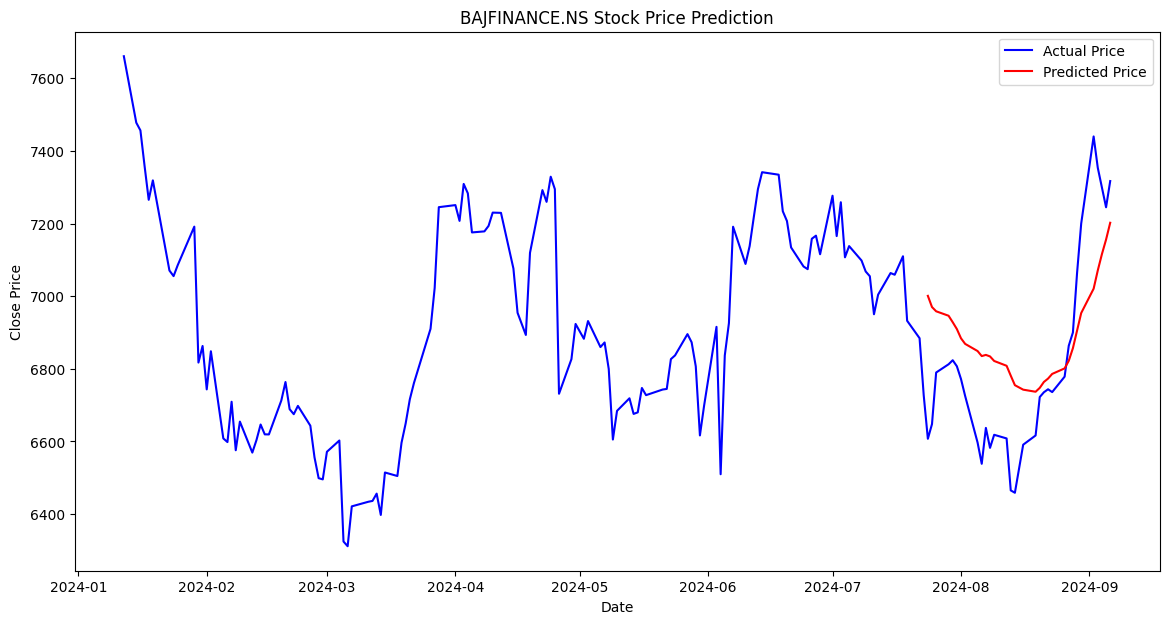

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

# 1. Fetch Stock Data
ticker_symbol = 'BAJFINANCE.NS'
data = yf.download(ticker_symbol, start='2023-12-31', end='2024-09-09')
df = data[['Close']].reset_index()

# 2. Handle Missing Values
df = df.dropna()

# 3. Feature Engineering
df['Days'] = (df['Date'] - df['Date'].min()).dt.days
df['MA10'] = df['Close'].rolling(window=10).mean()
df = df.dropna()

# 4. Define Features and Target
X = df[['Days', 'MA10']].values
y = df['Close'].values

# 5. Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 6. Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Make Predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# 8. Visualize the Results
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'], label='Actual Price', color='blue')
plt.plot(df['Date'][len(X_train):], y_pred, label='Predicted Price', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'{ticker_symbol} Stock Price Prediction')
plt.legend()
plt.show()